# CHIKV_Mac HIPPO FFF Prod. 6 (starting recipe)

## Setup

In [1]:
%load_ext autoreload
%autoreload 2
import hippo
from pathlib import Path
from mlog import setup_logger
import pandas as pd
import numpy as np
import molparse as mp
logger=setup_logger('notebook')

In [2]:
# !cp -v CHIKV_prod5.sqlite CHIKV_prod6.sqlite

In [3]:
animal = hippo.HIPPO('CHIKV_prod6', 'CHIKV_prod6.sqlite')

Creating HIPPO animal
name = CHIKV_prod6
db_path = CHIKV_prod6.sqlite
DEBUG: hippo3.Database.__init__()
DEBUG: Database.path = CHIKV_prod6.sqlite
DEBUG: hippo3.Database.connect()
DEBUG: sqlite3.version='2.6.0'
 SUCCESS  Database connected @ CHIKV_prod6.sqlite!
DEBUG: HIPPO.Database.create_table_route()
DEBUG: HIPPO.Database.create_table_component()
 SUCCESS  Initialised animal HIPPO("CHIKV_prod6")!


In [4]:
bases = animal.compounds(tag='Syndirella base')
bases

compounds tagged Syndirella base: {C x 68}

In [5]:
# add on all elaborations for C93
selection = bases + animal.C93.elabs
selection

{C x 76}

## Set global reaction yields

In [6]:
animal.reactions.types

['Amidation',
 'Buchwald-Hartwig_amination',
 'Ester_amidation',
 'N-Boc_deprotection',
 'Sp2-sp2_Suzuki_coupling',
 'Reductive_amination',
 'N-nucleophilic_aromatic_substitution',
 'Nucleophilic_substitution_with_amine',
 'Buchwald-Hartwig_amidation_with_amide-like_nucleophile',
 'Sp3-sp2_Suzuki_coupling',
 'Mitsunobu_reaction_with_amine_alcohol_and_thioalcohol',
 'Steglich_esterification']

In [7]:
animal.reactions.set_product_yields(type="Buchwald-Hartwig_amination", product_yield=0.1)
animal.reactions.set_product_yields(type="Buchwald-Hartwig_amidation_with_amide-like_nucleophile", product_yield=0.1)
animal.reactions.set_product_yields(type="Steglich_esterification", product_yield=0.1)

## Generate the recipe

In [8]:
%%time
recipe = hippo.Recipe.from_compounds(selection, pick_cheapest_inner_routes=True, supplier='Enamine', quoted_only=True, debug=False)

#compounds = 76
Solving individual compound recipes...


  0%|          | 0/76 [00:00<?, ?it/s]

 ERROR  No entry in quote with quote_compound=91!
 ERROR  Reactants not available for reaction=R22: C4458 + C4459 -> C91 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=91!
 ERROR  Reactants not available for reaction=R23: C4458 + C4460 -> C91 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C91!


  1%|▏         | 1/76 [00:00<00:08,  9.18it/s]

 ERROR  No entry in quote with quote_compound=92!
 ERROR  Reactants not available for reaction=R32: C4470 + C4471 -> C92 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C92!
 ERROR  No entry in quote with quote_compound=93!
 SUCCESS  Found solution for compound=C93!


  4%|▍         | 3/76 [00:00<00:04, 14.97it/s]

 ERROR  No entry in quote with quote_compound=95!
 SUCCESS  Found solution for compound=C95!
 ERROR  No entry in quote with quote_compound=98!
 ERROR  Reactants not available for reaction=R86: C4536 + C4537 -> C98 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=98!
 ERROR  Reactants not available for reaction=R87: C4536 + C4538 -> C98 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=98!
 ERROR  Reactants not available for reaction=R88: C4537 + C4539 -> C98 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=98!
 ERROR  Reactants not available for reaction=R89: C4538 + C4539 -> C98 via Sp3-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C98!


  7%|▋         | 5/76 [00:00<00:06, 11.48it/s]

 ERROR  No entry in quote with quote_compound=100!
 ERROR  No entry in quote with quote_compound=4464!
 ERROR  Reactants not available for reaction=R26: C50 + C4463 -> C4464 via Nucleophilic_substitution_with_amine!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No entry in quote with quote_compound=100!
 ERROR  Reactants not available for reaction=R93: C4464 + C4544 -> C100 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C100!
 ERROR  No entry in quote with quote_compound=101!
 ERROR  Reactants not available for reaction=R102: C4552 + C4553 -> C101 via Amidation!
 ERROR  No solutions for compound=C101!


  9%|▉         | 7/76 [00:00<00:05, 11.50it/s]

 ERROR  No entry in quote with quote_compound=104!
 SUCCESS  Found solution for compound=C104!
 ERROR  No entry in quote with quote_compound=372!
 ERROR  Reactants not available for reaction=R12: C1468 + C4440 -> C372 via Buchwald-Hartwig_amination!
 ERROR  No solutions for compound=C372!


 12%|█▏        | 9/76 [00:00<00:04, 13.60it/s]

 ERROR  No entry in quote with quote_compound=555!
 ERROR  Reactants not available for reaction=R119: C4426 + C4572 -> C555 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=555!
 ERROR  Reactants not available for reaction=R120: C4426 + C4573 -> C555 via Ester_amidation!
 ERROR  No solutions for compound=C555!
 ERROR  No entry in quote with quote_compound=569!
 ERROR  Reactants not available for reaction=R50: C4491 + C4492 -> C569 via Sp3-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C569!


 14%|█▍        | 11/76 [00:00<00:04, 14.34it/s]

 ERROR  No solutions for compound=C576!
 ERROR  No entry in quote with quote_compound=596!
 ERROR  Reactants not available for reaction=R58: C4502 + C4503 -> C596 via Buchwald-Hartwig_amination!
 ERROR  No solutions for compound=C596!
 ERROR  No entry in quote with quote_compound=627!
 ERROR  Reactants not available for reaction=R1: C4423 + C4424 -> C627 via Amidation!
 ERROR  No solutions for compound=C627!
 ERROR  No entry in quote with quote_compound=653!
 ERROR  Reactants not available for reaction=R3: C4427 + C4428 -> C653 via Amidation!
 ERROR  No solutions for compound=C653!


 20%|█▉        | 15/76 [00:00<00:03, 19.33it/s]

 ERROR  No entry in quote with quote_compound=662!
 ERROR  No entry in quote with quote_compound=4469!
 ERROR  Reactants not available for reaction=R31: C4443 + C4468 -> C4469 via Nucleophilic_substitution_with_amine!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No solutions for compound=C662!
 ERROR  No entry in quote with quote_compound=680!
 ERROR  Reactants not available for reaction=R34: C18 + C4473 -> C680 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C680!


 22%|██▏       | 17/76 [00:01<00:03, 17.90it/s]

 ERROR  No entry in quote with quote_compound=718!
 ERROR  Reactants not available for reaction=R121: C19 + C4574 -> C718 via Nucleophilic_substitution_with_amine!
 ERROR  No solutions for compound=C718!
 ERROR  No entry in quote with quote_compound=760!
 ERROR  Reactants not available for reaction=R104: C4555 + C4556 -> C760 via Mitsunobu_reaction_with_amine_alcohol_and_thioalcohol!
 ERROR  No solutions for compound=C760!
 ERROR  No entry in quote with quote_compound=796!
 ERROR  No entry in quote with quote_compound=796!
 Warning  Multiple solutions for compound=C796
 SUCCESS  Found solution for compound=C796!


 26%|██▋       | 20/76 [00:01<00:03, 16.89it/s]

 ERROR  No entry in quote with quote_compound=804!
 ERROR  Reactants not available for reaction=R45: C4485 + C4486 -> C804 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=804!
 ERROR  Reactants not available for reaction=R46: C4487 + C4488 -> C804 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=804!
 ERROR  Reactants not available for reaction=R47: C4485 + C4488 -> C804 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=804!
 ERROR  Reactants not available for reaction=R48: C4486 + C4487 -> C804 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C804!
 ERROR  No entry in quote with quote_compound=849!
 ERROR  Reactants not available for reaction=R16: C4440 + C4448 -> C849 via Ester_amidation!
 ERROR  No solutions for compound=C849!


 29%|██▉       | 22/76 [00:01<00:03, 14.32it/s]

 ERROR  No entry in quote with quote_compound=992!
 ERROR  Reactants not available for reaction=R63: C4510 + C4511 -> C992 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=992!
 ERROR  No entry in quote with quote_compound=4510!
 ERROR  Reactants not available for reaction=R62: C4508 + C4509 -> C4510 via Mitsunobu_reaction_with_amine_alcohol_and_thioalcohol!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No solutions for compound=C992!
 ERROR  No entry in quote with quote_compound=1001!
 SUCCESS  Found solution for compound=C1001!


 32%|███▏      | 24/76 [00:01<00:03, 13.20it/s]

 ERROR  No entry in quote with quote_compound=1012!
 ERROR  Reactants not available for reaction=R36: C4478 + C4479 -> C1012 via Amidation!
 ERROR  No solutions for compound=C1012!
 ERROR  No entry in quote with quote_compound=1029!
 ERROR  Reactants not available for reaction=R2: C4425 + C4426 -> C1029 via Amidation!
 ERROR  No solutions for compound=C1029!
 ERROR  No entry in quote with quote_compound=1119!
 ERROR  Reactants not available for reaction=R109: C4562 + C4563 -> C1119 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=1119!
 ERROR  Reactants not available for reaction=R110: C4562 + C4564 -> C1119 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=1119!
 ERROR  Reactants not available for reaction=R111: C4560 + C4562 -> C1119 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=1119!
 ERROR  Reactants not available for reaction=R112: C4558 + C4562 -> C1119 via Sp3-sp2_Suzuki_coupling!
 ERROR  No solution

 36%|███▌      | 27/76 [00:01<00:03, 12.78it/s]

 ERROR  No entry in quote with quote_compound=1128!
 ERROR  No entry in quote with quote_compound=1128!
 ERROR  Reactants not available for reaction=R106: C4557 + C4560 -> C1128 via Sp3-sp2_Suzuki_coupling!
 SUCCESS  Found solution for compound=C1128!
 ERROR  No entry in quote with quote_compound=1192!
 ERROR  Reactants not available for reaction=R5: C4431 + C4432 -> C1192 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=1192!
 ERROR  Reactants not available for reaction=R6: C4432 + C4433 -> C1192 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=1192!
 ERROR  Reactants not available for reaction=R7: C4432 + C4434 -> C1192 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=1192!
 ERROR  Reactants not available for reaction=R8: C4432 + C4435 -> C1192 via Ester_amidation!
 ERROR  No solutions for compound=C1192!


 38%|███▊      | 29/76 [00:02<00:04, 11.09it/s]

 ERROR  No entry in quote with quote_compound=1257!
 ERROR  No entry in quote with quote_compound=4464!
 ERROR  Reactants not available for reaction=R26: C50 + C4463 -> C4464 via Nucleophilic_substitution_with_amine!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No solutions for compound=C1257!
 ERROR  No entry in quote with quote_compound=1316!
 SUCCESS  Found solution for compound=C1316!


 41%|████      | 31/76 [00:02<00:03, 11.67it/s]

 ERROR  No entry in quote with quote_compound=1444!
 ERROR  Reactants not available for reaction=R101: C4424 + C4551 -> C1444 via Ester_amidation!
 ERROR  No solutions for compound=C1444!
 ERROR  No entry in quote with quote_compound=1446!
 ERROR  Reactants not available for reaction=R116: C4568 + C4569 -> C1446 via Amidation!
 ERROR  No solutions for compound=C1446!
 ERROR  No entry in quote with quote_compound=1466!
 ERROR  Reactants not available for reaction=R83: C4443 + C4531 -> C1466 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C1466!


 45%|████▍     | 34/76 [00:02<00:02, 14.36it/s]

 ERROR  No entry in quote with quote_compound=1472!
 ERROR  Reactants not available for reaction=R59: C1468 + C4504 -> C1472 via Buchwald-Hartwig_amination!
 ERROR  No solutions for compound=C1472!
 ERROR  No entry in quote with quote_compound=1473!
 ERROR  No entry in quote with quote_compound=1473!
 Warning  Multiple solutions for compound=C1473
 SUCCESS  Found solution for compound=C1473!


 47%|████▋     | 36/76 [00:02<00:02, 14.55it/s]

 ERROR  No entry in quote with quote_compound=1476!
 ERROR  Reactants not available for reaction=R24: C4443 + C4461 -> C1476 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C1476!
 ERROR  No entry in quote with quote_compound=1500!
 ERROR  Reactants not available for reaction=R10: C4437 + C4438 -> C1500 via Amidation!
 ERROR  No solutions for compound=C1500!
 ERROR  No entry in quote with quote_compound=1602!
 ERROR  Reactants not available for reaction=R56: C4424 + C4500 -> C1602 via Ester_amidation!
 ERROR  No solutions for compound=C1602!


 51%|█████▏    | 39/76 [00:02<00:02, 17.53it/s]

 ERROR  No entry in quote with quote_compound=1917!
 SUCCESS  Found solution for compound=C1917!
 ERROR  No entry in quote with quote_compound=1965!
 ERROR  Reactants not available for reaction=R4: C4429 + C4430 -> C1965 via Buchwald-Hartwig_amination!
 ERROR  No solutions for compound=C1965!
 ERROR  No entry in quote with quote_compound=2138!
 ERROR  Reactants not available for reaction=R52: C4494 + C4495 -> C2138 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=2138!
 ERROR  Reactants not available for reaction=R53: C4494 + C4496 -> C2138 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C2138!


 55%|█████▌    | 42/76 [00:02<00:01, 18.72it/s]

 ERROR  No entry in quote with quote_compound=2186!
 ERROR  Reactants not available for reaction=R90: C4442 + C4540 -> C2186 via Ester_amidation!
 ERROR  No solutions for compound=C2186!
 ERROR  No entry in quote with quote_compound=2188!
 ERROR  Reactants not available for reaction=R25: C4443 + C4462 -> C2188 via Amidation!
 ERROR  No solutions for compound=C2188!
 ERROR  No entry in quote with quote_compound=2207!
 ERROR  Reactants not available for reaction=R91: C4541 + C4542 -> C2207 via Reductive_amination!
 ERROR  No solutions for compound=C2207!
 ERROR  No entry in quote with quote_compound=2300!
 ERROR  No entry in quote with quote_compound=4456!
 ERROR  Reactants not available for reaction=R21: C4454 + C4457 -> C4456 via Amidation!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No solutions for compound=C2300!


 61%|██████    | 46/76 [00:02<00:01, 20.84it/s]

 ERROR  No entry in quote with quote_compound=2311!
 ERROR  Reactants not available for reaction=R84: C4532 + C4533 -> C2311 via Nucleophilic_substitution_with_amine!
 ERROR  No solutions for compound=C2311!
 ERROR  No entry in quote with quote_compound=2619!
 ERROR  Reactants not available for reaction=R13: C4441 + C4443 -> C2619 via Amidation!
 ERROR  No solutions for compound=C2619!
 ERROR  No entry in quote with quote_compound=2916!
 SUCCESS  Found solution for compound=C2916!
 ERROR  No entry in quote with quote_compound=2919!
 ERROR  Reactants not available for reaction=R99: C4439 + C4549 -> C2919 via Amidation!
 ERROR  No solutions for compound=C2919!


 66%|██████▌   | 50/76 [00:03<00:01, 23.54it/s]

 ERROR  No entry in quote with quote_compound=2924!
 ERROR  Reactants not available for reaction=R117: C3983 + C4571 -> C2924 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=2924!
 ERROR  Reactants not available for reaction=R118: C3983 + C4528 -> C2924 via Ester_amidation!
 ERROR  No solutions for compound=C2924!
 ERROR  No entry in quote with quote_compound=2925!
 SUCCESS  Found solution for compound=C2925!
 ERROR  No entry in quote with quote_compound=2944!
 ERROR  Reactants not available for reaction=R11: C4423 + C4439 -> C2944 via Amidation!
 ERROR  No solutions for compound=C2944!


 70%|██████▉   | 53/76 [00:03<00:00, 23.56it/s]

 ERROR  No entry in quote with quote_compound=2947!
 ERROR  Reactants not available for reaction=R65: C4439 + C4513 -> C2947 via Amidation!
 ERROR  No solutions for compound=C2947!
 ERROR  No entry in quote with quote_compound=3204!
 ERROR  Reactants not available for reaction=R39: C4445 + C4481 -> C3204 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3204!
 ERROR  Reactants not available for reaction=R40: C4447 + C4481 -> C3204 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3204!
 ERROR  Reactants not available for reaction=R41: C4447 + C4482 -> C3204 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3204!
 ERROR  Reactants not available for reaction=R42: C4445 + C4482 -> C3204 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C3204!
 ERROR  No entry in quote with quote_compound=3264!
 ERROR  No entry in quote with quote_compound=4567!
 ERROR  Reactants not available for reaction=R113: C4565 +

 74%|███████▎  | 56/76 [00:03<00:01, 18.17it/s]

 ERROR  No entry in quote with quote_compound=3269!
 ERROR  Reactants not available for reaction=R95: C4445 + C4547 -> C3269 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3269!
 ERROR  Reactants not available for reaction=R96: C4445 + C4548 -> C3269 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3269!
 ERROR  Reactants not available for reaction=R97: C4447 + C4548 -> C3269 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3269!
 ERROR  Reactants not available for reaction=R98: C4447 + C4547 -> C3269 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C3269!
 ERROR  No entry in quote with quote_compound=3284!
 ERROR  No entry in quote with quote_compound=3284!
 Warning  Multiple solutions for compound=C3284
 SUCCESS  Found solution for compound=C3284!
 ERROR  No entry in quote with quote_compound=3344!
 ERROR  Reactants not available for reaction=R28: C4443 + C4465 -> C3344 via Amidation!
 ERROR

 78%|███████▊  | 59/76 [00:03<00:01, 16.75it/s]

 ERROR  No entry in quote with quote_compound=3611!
 ERROR  Reactants not available for reaction=R55: C4498 + C4499 -> C3611 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C3611!
 ERROR  No entry in quote with quote_compound=3624!
 SUCCESS  Found solution for compound=C3624!
 ERROR  No entry in quote with quote_compound=3625!
 SUCCESS  Found solution for compound=C3625!


 82%|████████▏ | 62/76 [00:03<00:00, 19.01it/s]

 ERROR  No entry in quote with quote_compound=3627!
 ERROR  Reactants not available for reaction=R100: C4452 + C4550 -> C3627 via Ester_amidation!
 ERROR  No solutions for compound=C3627!
 ERROR  No entry in quote with quote_compound=3628!
 SUCCESS  Found solution for compound=C3628!
 ERROR  No entry in quote with quote_compound=3632!
 ERROR  Reactants not available for reaction=R19: C4452 + C4453 -> C3632 via Amidation!
 ERROR  No solutions for compound=C3632!


 86%|████████▌ | 65/76 [00:03<00:00, 21.26it/s]

 ERROR  No entry in quote with quote_compound=3653!
 ERROR  Reactants not available for reaction=R44: C4452 + C4484 -> C3653 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C3653!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R66: C3755 + C4514 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R67: C3755 + C4515 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R68: C3755 + C4516 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R69: C3755 + C4517 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R70: C3755 + C4518 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Re

 89%|████████▉ | 68/76 [00:04<00:00, 12.39it/s]

 ERROR  No entry in quote with quote_compound=76982!
 SUCCESS  Found solution for compound=C76982!
 ERROR  No entry in quote with quote_compound=76984!
 SUCCESS  Found solution for compound=C76984!
 ERROR  No entry in quote with quote_compound=76986!
 ERROR  Reactants not available for reaction=R63377: C85 + C76985 -> C76986 via Buchwald-Hartwig_amidation_with_amide-like_nucleophile!
 ERROR  No solutions for compound=C76986!


 93%|█████████▎| 71/76 [00:04<00:00, 14.76it/s]

 ERROR  No entry in quote with quote_compound=76988!
 ERROR  Reactants not available for reaction=R63378: C85 + C76987 -> C76988 via Buchwald-Hartwig_amidation_with_amide-like_nucleophile!
 ERROR  No solutions for compound=C76988!
 ERROR  No entry in quote with quote_compound=76990!
 SUCCESS  Found solution for compound=C76990!
 ERROR  No entry in quote with quote_compound=76992!
 ERROR  Reactants not available for reaction=R63380: C85 + C76991 -> C76992 via Buchwald-Hartwig_amidation_with_amide-like_nucleophile!
 ERROR  No solutions for compound=C76992!
 ERROR  No entry in quote with quote_compound=76994!
 SUCCESS  Found solution for compound=C76994!


 99%|█████████▊| 75/76 [00:04<00:00, 17.92it/s]

 ERROR  No entry in quote with quote_compound=76996!
 SUCCESS  Found solution for compound=C76996!


100%|██████████| 76/76 [00:04<00:00, 16.19it/s]

Solving recipe combinations...
Combining recipes...



100%|██████████| 1/1 [00:00<00:00, 38.71it/s]

Picking cheapest...
CPU times: user 4.19 s, sys: 496 ms, total: 4.69 s
Wall time: 4.74 s


In [40]:
# recipe.write_CAR_csv('CHIKV_15bases_chemistry.csv',return_df=True)

In [9]:
fig = recipe.sankey()
mp.write('CHIKV_starting_recipe_sankey.html',fig)

 ERROR  No entry in quote with quote_compound=93!
 ERROR  No entry in quote with quote_compound=93!
 ERROR  No entry in quote with quote_compound=95!
 ERROR  No entry in quote with quote_compound=95!
 ERROR  No entry in quote with quote_compound=104!
 ERROR  No entry in quote with quote_compound=104!
 ERROR  No entry in quote with quote_compound=796!
 ERROR  No entry in quote with quote_compound=796!
 ERROR  No entry in quote with quote_compound=1001!
 ERROR  No entry in quote with quote_compound=1001!
 ERROR  No entry in quote with quote_compound=1128!
 ERROR  No entry in quote with quote_compound=1128!
 ERROR  No entry in quote with quote_compound=1316!
 ERROR  No entry in quote with quote_compound=1316!
 ERROR  No entry in quote with quote_compound=1473!
 ERROR  No entry in quote with quote_compound=1473!
 ERROR  No entry in quote with quote_compound=1917!
 ERROR  No entry in quote with quote_compound=1917!
 ERROR  No entry in quote with quote_compound=2916!
 ERROR  No entry in quot

In [10]:
recipe.write_json('CHIKV_starting_recipe_yields.json')

 DISK  Writing CHIKV_starting_recipe_yields.json


## Export to Fragalysis

In [ ]:
poses15.to_fragalysis('syndirella_scaffolds_15.sdf',
                      method='Accessible FFF Scaffolds',
                      submitter_name='Max Winokan',
                      submitter_email='max.winokan@diamond.ac.uk',
                      submitter_institution='DLS',
                     )

## Sanity check products

In [235]:
prods = recipe.products

In [236]:
for prod in prods:
    print(prod.id, prod.smiles, prod.inchikey, prod.elabs)

93 CCc1nc(NC(=O)c2ccnc(NC3CC=CC3)c2)no1 WXVLITNXXROEMR-UHFFFAOYSA-N elaborations of C93: {C x 8}
95 O=c1ccncn1CC1CCS(=O)(=O)C1 UGYMLSSIEIESGU-UHFFFAOYSA-N elaborations of C95: {C x 952}
104 Cn1c(N)nc2cccc(NCc3cccs3)c21 DGASNXVGKHJXGC-UHFFFAOYSA-N elaborations of C104: {C x 1452}
796 Nc1cc(-c2cc[nH]n2)cc2c1OCO2 RGWZNWCCBDMABV-UHFFFAOYSA-N elaborations of C796: {C x 197}
1001 COC(=O)c1cnc2[nH]cc(C)cc1-2 QZVYQICELPCZOV-UHFFFAOYSA-N None
1128 CC(C)c1cccc2[nH]cnc12 DZVXXHSUENHLJH-UHFFFAOYSA-N elaborations of C1128: {C x 1453}
1316 CC1CN(C(=O)c2cccc(F)c2)CCN1 GEKAQEZWMKZGCA-UHFFFAOYSA-N elaborations of C1316: {C x 1662}
1473 CC(C)(C)c1cnc2ccccc2n1 MMXSHBZOILNLPJ-UHFFFAOYSA-N elaborations of C1473: {C x 1352}
1917 CCc1nc(Cn2ccc(Br)cc2=O)no1 QQERROZMPKKQER-UHFFFAOYSA-N elaborations of C1917: {C x 803}
2916 COCC(=O)Nc1cccc(C(=O)NCc2cccs2)c1 QVSYFXSEJNFZKD-UHFFFAOYSA-N elaborations of C2916: {C x 1460}
2925 Cc1cccc(O)c1Nc1ccccc1 XQWKZXHQRAAZAF-UHFFFAOYSA-N elaborations of C2925: {C x 5434}
3284 

In [188]:
c = animal.C92
recipes = c.get_recipes()
recipes

#compounds = 1
Solving individual compound recipes...
 ERROR  No entry in quote with quote_compound=92!
 ERROR  No entry in quote with quote_compound=4470!
 SUCCESS  Found solution for compound=C92!
Solving recipe combinations...
Combining recipes...


[Recipe({I x 2} --> {I x 1} via {R x 1})]

In [184]:
selection.interactive()

Output()

In [191]:
for comp in selection:
    print(comp, comp.inchikey, 'Syndirella base' in comp.tags)

C91 WRQXFZOITXUYML-UHFFFAOYSA-N True
C92 SCMCRGMETQKMMQ-UHFFFAOYSA-N True
C93 WXVLITNXXROEMR-UHFFFAOYSA-N True
C95 UGYMLSSIEIESGU-UHFFFAOYSA-N True
C98 KRUZICJRZZZCFH-UHFFFAOYSA-N True
C100 LKSJOAHCUYUSRB-UHFFFAOYSA-N True
C101 OHSGHNZPVAYZHL-UHFFFAOYSA-N True
C104 DGASNXVGKHJXGC-UHFFFAOYSA-N True
C372 ALGNJYIWMHXFNH-UHFFFAOYSA-N True
C555 ZJENMQHSGLZNHL-UHFFFAOYSA-N True
C569 OYZLDUQCBJYBED-UHFFFAOYSA-N True
C576 TYBDSUPMDPIPBB-UHFFFAOYSA-N True
C596 JAHJLJNEYRGXQB-UHFFFAOYSA-N True
C627 SMVDAYWKXWVCAN-UHFFFAOYSA-N True
C653 FCGOSHSMTQLVEX-UHFFFAOYSA-N True
C662 CTECJTBKOFPTMY-UHFFFAOYSA-N True
C680 LKDGGWMXOHPRMI-UHFFFAOYSA-N True
C718 GQXYNJMUNPQGML-UHFFFAOYSA-N True
C760 WZMWLLZLOKQLRZ-UHFFFAOYSA-N True
C796 RGWZNWCCBDMABV-UHFFFAOYSA-N True
C804 JOXQXTUGOHUMII-UHFFFAOYSA-N True
C849 LSBSLADJXDRYPT-UHFFFAOYSA-N True
C992 VXOZIAXPIMEJPP-UHFFFAOYSA-N True
C1001 QZVYQICELPCZOV-UHFFFAOYSA-N True
C1012 KIULBMGWDSJTMM-UHFFFAOYSA-N True
C1029 MNLAWAQYKQVGLK-UHFFFAOYSA-N True
C1119 LCANJRPV

#compounds = 1
Solving individual compound recipes...
 ERROR  No entry in quote with quote_compound=2300!
 ERROR  No entry in quote with quote_compound=4456!
 ERROR  No entry in quote with quote_compound=4454!
 ERROR  No entry in quote with quote_compound=4456!
 SUCCESS  Found solution for compound=C2300!
Solving recipe combinations...
Combining recipes...
 ERROR  No entry in quote with quote_compound=4454!
 ERROR  No entry in quote with quote_compound=4454!
 ERROR  No entry in quote with quote_compound=4456!
 ERROR  No entry in quote with quote_compound=4456!
 ERROR  No entry in quote with quote_compound=2300!
 ERROR  No entry in quote with quote_compound=2300!
 ERROR  No entry in quote with quote_compound=4454!
 ERROR  No entry in quote with quote_compound=4454!


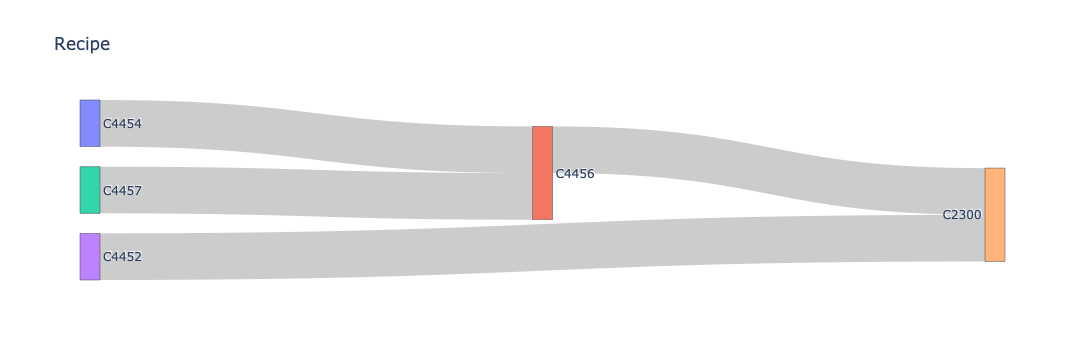

In [243]:
animal.compounds['WLFMTZKZYACXSW-UHFFFAOYSA-N'].get_recipes()[0].sankey()

In [211]:
df = animal.add_syndirella_elabs('/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac/IBNRYRKGRKRSMK-NSHDSACASA-N/IBNRYRKGRKRSMK-NSHDSACASA-N_fMJ6FM_to_hippo.pkl.gz')
# df = animal.add_syndirella_elabs('/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac/RTRFWLCSCBITKB-UHFFFAOYSA-N/RTRFWLCSCBITKB-UHFFFAOYSA-N_6PQWWH_to_hippo.pkl.gz')

Present reactions = {'N-Bn_deprotection', 'Amide_Schotten-Baumann_with_amine', 'Nucleophilic_substitution_with_amine', 'Amidation'}
 ERROR  No base/scaffold rows found in IBNRYRKGRKRSMK-NSHDSACASA-N_fMJ6FM_to_hippo.pkl.gz!


In [204]:
df = animal.add_syndirella_elabs('/opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac/RTRFWLCSCBITKB-UHFFFAOYSA-N/RTRFWLCSCBITKB-UHFFFAOYSA-N_6PQWWH_to_hippo.pkl.gz')

Present reactions = {'Ester_amidation', 'Amidation'}
 ERROR  No base/scaffold rows found in RTRFWLCSCBITKB-UHFFFAOYSA-N_6PQWWH_to_hippo.pkl.gz!


In [205]:
df.columns

Index(['base_compound_smiles', '1_reaction', '1_r1_smiles', '1_r2_smiles',
       '1_r_previous_product', '1_product_smiles', '1_product_name',
       '1_num_atom_diff', '1_flag', '2_reaction', '2_r1_smiles', '2_r2_smiles',
       '2_r_previous_product', '2_product_smiles', '2_product_name',
       '2_num_atom_diff', '2_flag', '2_stereoisomer', 'error', '∆∆G',
       '∆G_bound', '∆G_unbound', 'comRMSD', 'regarded', 'path_to_mol',
       'intra_geometry_pass'],
      dtype='object')

In [206]:
set(df['2_num_atom_diff'].values)

{1, 2, 3, 4, 5}

In [238]:
'YIIMVUSFSKUYCA-UHFFFAOYSA-N' in prods.inchikeys

False

In [239]:
for i in ["WLFMTZKZYACXSW-UHFFFAOYSA-N",
"OYAFCPFGSBONSE-UHFFFAOYSA-N",
"CTECJTBKOFPTMY-JTQLQIEISA-N",
"WLFMTZKZYACXSW-UHFFFAOYSA-N",
"OYZLDUQCBJYBED-VIFPVBQESA-N",
"SBEBTLKTHHBVAY-LLVKDONJSA-N",
"XXPRWRCNORVHSY-UHFFFAOYSA-N",
"JAHJLJNEYRGXQB-RBSFLKMASA-N",
"VXOZIAXPIMEJPP-UHFFFAOYSA-N",
"UQJZJBUURJWCJN-UHFFFAOYSA-N",
"LKSJOAHCUYUSRB-UHFFFAOYSA-N",
"CVNPYWIROGTFDL-UHFFFAOYSA-N",]:
    if i in prods.inchikeys:
        print(i)

In [246]:
animal.C4452.get_quotes(df=True)

,id,smiles,supplier,catalogue,entry,amount,price,purity,lead_time,date,type
0,32,Nc1ccc(O)cc1,Enamine,In stock,EN300-33645,20.0,€17.00 EUR,0.95,5,2024-09-25,None
1,5295,Nc1ccc(O)cc1,Enamine,In stock,EN300-33645,50.0,€18.00 EUR,0.95,5,2024-09-25,None
2,10558,Nc1ccc(O)cc1,Enamine,In stock,EN300-33645,100.0,€18.00 EUR,0.95,5,2024-09-25,None
3,15821,Nc1ccc(O)cc1,Enamine,In stock,EN300-33645,250.0,€18.00 EUR,0.95,5,2024-09-25,None


In [254]:
recipe.products.compounds.poses.num_inspirations

18

In [258]:
recipe.products.compounds.poses.num_inspiration_sets

14

In [257]:
bases.poses.num_inspirations

62

In [266]:
for comp in animal.compounds(tag='knitwork'):
    print(comp, comp)

AttributeError: 'Compound' object has no attribute 'exports'

In [49]:
[(id,amount) for id,amount in recipe.reactants.df[['compound_id','amount']].values]

[(85, 60.0),
 (4554, 10.0),
 (4466, 1.0),
 (4467, 1.0),
 (4440, 10.0),
 (4530, 10.0),
 (4445, 2.0),
 (4480, 1.0),
 (4545, 10.0),
 (4546, 10.0),
 (4557, 1.0),
 (4558, 1.0),
 (4534, 1.0),
 (4535, 1.0),
 (4505, 1.0),
 (4507, 1.0),
 (84, 1.0),
 (4472, 1.0),
 (4449, 1.0),
 (4450, 1.0),
 (4439, 10.0),
 (4451, 20.0),
 (4444, 1.0),
 (4476, 10.0),
 (4477, 10.0),
 (4452, 20.0),
 (4483, 10.0),
 (76981, 10.0),
 (76983, 10.0),
 (76989, 10.0),
 (76993, 10.0),
 (76995, 10.0)]

In [50]:
animal.db.execute("""COL_LENGTH ( 'table' , 'column' )""").fetchall()

OperationalError: near "COL_LENGTH": syntax error

In [73]:
animal.db.column_names('component')

['component_id', 'component_route', 'component_type', 'component_ref']

In [56]:
animal.db.execute("""PRAGMA table_info(component);""").fetchall()

[(0, 'component_id', 'INTEGER', 0, None, 1),
 (1, 'component_route', 'INTEGER', 0, None, 0),
 (2, 'component_type', 'INTEGER', 0, None, 0),
 (3, 'component_ref', 'INTEGER', 0, None, 0)]

In [57]:
animal.db.table_info("component")

[(0, 'component_id', 'INTEGER', 0, None, 1),
 (1, 'component_route', 'INTEGER', 0, None, 0),
 (2, 'component_type', 'INTEGER', 0, None, 0),
 (3, 'component_ref', 'INTEGER', 0, None, 0)]